In [3]:
import pandas as pd
import numpy as np
import glob
import os

In [4]:
data = glob.glob(os.path.join('dataset','*.csv'))

In [5]:
df = pd.read_csv(data[1])

C:\Users\akash.m.jadhav\AppData\Local\Continuum\anaconda3\envs\p38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

((555957, 18), None)

In [7]:
df['product'].value_counts()

Mortgage                   186475
Debt collection            101052
Credit reporting            91854
Credit card                 66468
Bank account or service     62563
Consumer Loan               20990
Student loan                15839
Payday loan                  3877
Money transfers              3812
Prepaid card                 2470
Other financial service       557
Name: product, dtype: int64

<AxesSubplot:>

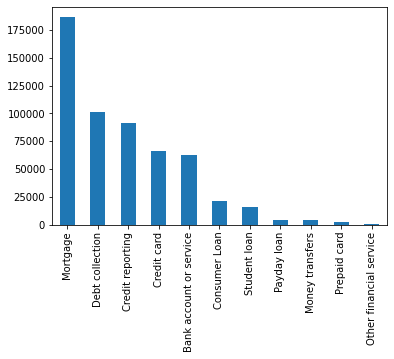

In [8]:
df['product'].value_counts().sort_values(ascending= False).plot(kind = 'bar')

In [9]:
import re
from nltk.corpus import stopwords
from nltk import word_tokenize

In [10]:
replace_by_space = re.compile('[/(){}\[\]\|@,;]')
bad_sym = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

In [11]:
t1 = 'RE : PREDATORY LENDING COMPLAINT To Whom It May Concern : I am writing to file a complaint against ECMC because of their predatory lending practices. I mailed out two certified letters, the first letter was a debt validation letter via cert number : XXXX XXXX XXXX XXXX XXXX and the second letter titled Notice of Estoppel via cert number : XXXX XXXX XXXX XXXX XXXX. ( Please see attachments A & B ). I  started my credit restoration with a Certified Credit Counselor in XX/XX/2018'

In [12]:
def clean_text(text):
    text = text.lower()
    text = replace_by_space.sub(' ',text)
    text = bad_sym.sub('', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text


In [13]:
df.dropna(subset = ['consumer_complaint_narrative'], inplace = True)
df['consumer_complaint_narrative'] = df['consumer_complaint_narrative'].apply(clean_text)

In [14]:
from keras.preprocessing.text import Tokenizer
max_words = 50000
max_seq = 250
emb_dim = 100
tokenizer = Tokenizer(num_words=max_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['consumer_complaint_narrative'].values)
word_index = tokenizer.word_index

In [15]:
X = tokenizer.texts_to_sequences(df['consumer_complaint_narrative'].values)
X

[[1,
  633,
  128,
  3544,
  1,
  43,
  501,
  161,
  7,
  25,
  1195,
  54,
  29486,
  1511,
  3544,
  236,
  2295,
  128,
  44,
  248,
  206,
  844,
  81,
  199,
  26,
  1198,
  43,
  198],
 [37,
  5322,
  38,
  193,
  9,
  8,
  38,
  121,
  2,
  55,
  248,
  205,
  980,
  257,
  27,
  213,
  78,
  103,
  72,
  283,
  1571,
  118,
  2,
  12,
  1484,
  393,
  756,
  2849,
  357,
  578,
  111,
  19,
  111,
  19,
  2443,
  29487,
  29488,
  649,
  46,
  6,
  9,
  8,
  45,
  46,
  37,
  6,
  257,
  1017,
  98,
  13,
  161,
  45,
  46,
  35,
  1422,
  7,
  914,
  845,
  10,
  25,
  5367,
  27,
  45,
  1550,
  21,
  2662,
  10,
  2124,
  1292,
  283,
  1571,
  2,
  12,
  50,
  262,
  1,
  39,
  239,
  2,
  1430,
  90,
  613,
  535,
  46,
  921,
  575,
  2,
  12,
  1,
  1,
  39,
  535,
  46,
  1714,
  1226,
  2443,
  111,
  111,
  19,
  26,
  8,
  442,
  45,
  128,
  3581,
  2491,
  199,
  26,
  59,
  8,
  230,
  318,
  478,
  120,
  215,
  2121,
  172,
  195],
 [4,
  4,
  1,
  1224,
  1876

In [16]:
from keras.preprocessing.sequence import pad_sequences
X = pad_sequences(X, maxlen= max_seq)
X

array([[   0,    0,    0, ..., 1198,   43,  198],
       [   0,    0,    0, ..., 2121,  172,  195],
       [ 394,    1,  266, ...,  572, 3602, 1915],
       ...,
       [   0,    0,    0, ..., 1137,   87,    1],
       [   0,    0,    0, ...,   71,  960,  324],
       [ 663,  666,  273, ..., 1594,    3,  738]])

In [29]:
from sklearn.model_selection import train_test_split

In [85]:
y= pd.get_dummies(df['product']).values
y.shape, y

((66806, 11),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 41)

In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, SpatialDropout1D, Dropout

model = Sequential()
model.add(Embedding(max_words, emb_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, recurrent_dropout=0.2))
model.add(Dense(11, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(x_train, y_train, validation_split=0.2, epochs=1, batch_size = 512)

84/84 [==============================] - 233s 3s/step - loss: 1.9914 - accuracy: 0.3146 - val_loss: 1.3287 - val_accuracy: 0.5386


In [39]:
acc = model.evaluate(x_test, y_test)
acc

418/418 [==============================] - 29s 69ms/step - loss: 1.3253 - accuracy: 0.5436


[1.3253215551376343, 0.5435563325881958]

In [91]:
y_lab = pd.get_dummies(df['product'])
labels = y_lab.columns
labels

Index(['Bank account or service', 'Consumer Loan', 'Credit card',
       'Credit reporting', 'Debt collection', 'Money transfers', 'Mortgage',
       'Other financial service', 'Payday loan', 'Prepaid card',
       'Student loan'],
      dtype='object')

In [102]:
def predict_class(text):
    seq = tokenizer.texts_to_sequences(text)
    pad = pad_sequences(seq, maxlen= max_seq)
    pred = model.predict(pad)
    label = labels[np.argmax(pred)]
    return pred, label

In [104]:
text = [list(df['consumer_complaint_narrative'])[1]]
proba, label = predict_class(text)
print(proba, label)

[[0.04167853 0.05866843 0.15547341 0.2283454  0.39337543 0.00988199
  0.0569023  0.00543907 0.0146934  0.01267695 0.02286517]] Debt collection
